<a href="https://colab.research.google.com/github/kwanda2426/Classification-Hackathon/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg">

<img src="https://ak.picdn.net/shutterstock/videos/29784268/thumb/12.jpg" width=1200 height=300 />

<img src="https://image.slidesharecdn.com/attacksimulationhuntingmadeeasy-171204085132/95/attack-simulation-and-hunting-1-638.jpg?cb=1512377787" width=1200 height=300 />

<a id="top"></a>
#  Classification Hackathon 
##### Kwanda Mazibuko <sup> </sup>

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering and Feature Selection](#features)
6. [Modelling](#model)
7. [Model Evaluation](#evaluation)
8. [Hyperparameter Tuning](#tuning)
9. [Conclusion](#conclusion) 

<a id="intro"></a>
## 1. Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.


### Problem Statement

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

### Objectives
The key objective is to build a Machine Learning model that will take text which is in any of South Africa's 11 Official languages and identify which language the text is in.

<a id="data"></a>
## 2. Data Collection

Data collection is the process of gathering and measuring information on variables of interest, in an established systematic fashion that enables one to answer stated questions, test hypotheses, and evaluate outcomes. We don't need to collect data because it has been provided to us with different classes.

#### Class Description 

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

In [2]:
!pip install comet_ml
!pip install unidecode
!pip install unicode
!pip install wordcloud

     |████████████████████████████████| 308 kB 4.2 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 546 kB 48.9 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=5ecba8c6f3201a24519207ecaa799be1406147aeeb250f9cd173f7447c609f67
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
     |████████████████████████████████| 235 kB 4.3 MB/s 


In [3]:
# Data manipulation
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import unidecode
import unicodedata
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# For searching patterns on the tweets (regex)
import re
# datetime
import datetime

# Libraries for data preparation and model building
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# visualizations
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# saving my model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Read data
df_test = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/Classification-Hackathon/main/Data/test_set.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/Classification-Hackathon/main/Data/train_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### Data Overview

**Train dataset**

In [6]:
# Checking how our training dataset looks like
print("Rows    : ", df_train.shape[0])

print("Columns : ", df_train.shape[1])

print("\nMissing values: ", df_train.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_train.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_train.columns:
    unique_out = len(df_train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  33000
Columns :  2

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
  
 None

About the data: 

Feature 'lang_id' has 11 unique categories
Feature 'text' has 29948 unique categories


**Test dataset**

In [7]:
# Checking how our data looks like
print("Rows    : ", df_test.shape[0])

print("Columns : ", df_test.shape[1])

print("\nMissing values: ", df_test.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_test.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_test.columns:
    unique_out = len(df_test[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  5682
Columns :  2

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
  
 None

About the data: 

Feature 'index' has 5682 unique categories
Feature 'text' has 5459 unique categories


<a id="cleaning"></a>
## 3. Data Preprocessing

Data preprocessing is a technique that involves taking in raw data and transforming it into a understable format. The technique includes data cleaning, intergration, transformation, reduction and discretization. The data preprocessing plan will include the following processes:

- **Data cleaning**



### Data Cleaning 

Data cleaning is a process of improving the quality of the data by identifying corrupt or erroneous records from a data set and rectifying them.

The data cleaning process will include the following:
- Expanding contractions where necessary
- Removal of the noise:
    - punctuations
    - numbers

#### Convert text to lowercase

In [8]:
def lowercase(text):
    text = text.lower() # making text to be lowercase
    return text

df_train['text'] = df_train['text'].apply(lowercase)

df_test['text'] = df_test['text'].apply(lowercase)

#### Remove Noise from Text

Data that can not be processed/interpreted by a machine is classified as noisy data. Text data contains a lot of noise, this comes in a  form of special characters punctuation and numbers. During this process the data will be changed from accent letters to normal letters and the noise will be removed.

In [9]:
 
def clean_text(text):
    
    """takes string of text and return a string of text with no punctuations,
    white spaces """
    
    text = re.sub("\\s+", " ", text)  # Remove extra whitespace
                  
    text = re.sub("(\#)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\-)", " ", text) # replace punctuation with space
    
    text = re.sub("(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})"," ",text)# replace punctuation with space
    
    text = text.lstrip()  # removes whitespaces before string
    
    text = text.rstrip()  # removes whitespaces after string
    
    return text

df_train['clean_text'] = df_train['text'].apply(clean_text)

df_test['clean_text'] = df_test['text'].apply(clean_text)

In [10]:
# remove numbers

def remove_numbers(text):
    
    """takes a string of text and remove numbers"""
    
    number_pattern = r'\d+'
    
    without_number = re.sub(pattern = number_pattern, repl = " ", string = text)
    
    return without_number

df_train['clean_text'] = df_train['clean_text'].apply(lambda x: remove_numbers(x))

df_test['clean_text'] = df_test['clean_text'].apply(lambda x: remove_numbers(x))

In [11]:
df_train.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### Tokenization

Tokenization is a process of breaking down unstructured data and natural language text into smaller units called tokens. During this process we will first tokenize the tweets and then transform the data using the TreebankWord.

In [12]:
#start by tokenizing the tweets
tokeniser = TreebankWordTokenizer()

# transforming the data using the Treebankword tokenizer
df_train['tokenized'] = df_train['clean_text'].apply(tokeniser.tokenize)

df_train

,lang_id,text,clean_text,tokenized
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb..."
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
...,...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,..."
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi na o ntse o sa utlwe hore thaban...,"[modise, mosadi, na, o, ntse, o, sa, utlwe, ho..."
32997,eng,closing date for the submission of completed t...,closing date for the submission of completed t...,"[closing, date, for, the, submission, of, comp..."
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants..."


#### Lemmatization

Lemmatization is a process of converting/reducing a word to it meaningful root/base. During this process we will first change the column clean_message into a list, tagging the tweets and performing POS tagging.

In [13]:

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

nltk.download("wordnet")

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

df_train["lemma_text"] = df_train["clean_text"].apply(lambda x: lemmatizing(x))

df_train.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,lang_id,text,clean_text,tokenized,lemma_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...",o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="EDA"></a>
## 4. Exploratory Data Analysis

During the exploratory data analysis process we will be looking into gaining ana accurate and deep understanding of the dataset. We will achieve this by performing the following processes:

- Sentiment distribution
- Tweet length distribution
- Hashtag analysis
- Frequently words from each sentiment
- Other frequent words without common words
- Mentions analysis
- Representation of mentions on wordcloud

### Language_id Distribution

Based on the plot below we observe that sentiment distribution is disproportional with the pro climate change class taking up a large portion of the data.

In [14]:
# labels
lab = list(set(df_train['lang_id']))
# values
val = df_train.lang_id.value_counts().values.tolist()
# create pie chart
fig = px.pie(df_train, 
             values = val,
             names = lab,
             title = "Sentiment distribution in data",
             hole = .5
            )
# update traces
fig.update_traces(
            textposition = "inside",
            textinfo = "percent +label")
# update layout
fig.update_layout(
    title_font_size = 22,
    plot_bgcolor = "rgb(243,243,243)",
    paper_bgcolor= "rgb(243,243,243)")

### Length of character distribution for each language

#### Length of characters in each tweet per sentiment boxplots

From the boxplots below we observed that tweets that fall under the news climate change class have the lowest length of characters per tweet, followed by the pro climate change class that has a cluster of outliers below the lower whisker. The neutral climate change class have the highest length of characters per tweet.

In [15]:
# Finding Number of Words per Tweet from the lemmatized words
df_train["num_words"] = df_train["lemma_text"].apply(lambda x: len(str(x).split()))


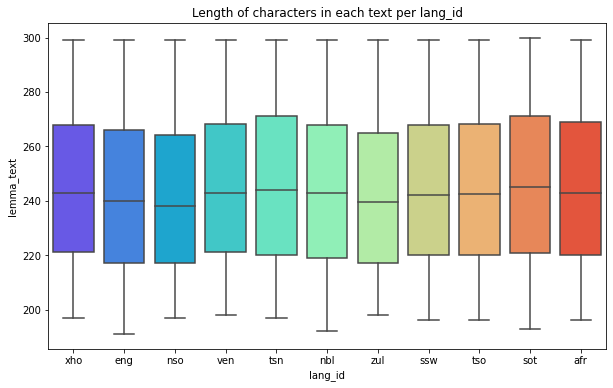

In [16]:
# Boxplot for the number of characters in each tweet
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x = df_train['lang_id'], y = df_train['lemma_text'].str.len(), data = df_train, palette=("rainbow"), ax = ax)

# title of the boxplot
plt.title('Length of characters in each text per lang_id')

# showing the plot
plt.show()

#### Number of words in each text for each lang_id boxplots

From the boxplots below we observed that tweets that fall under the news climate change class have the lowest number of words per tweet and the tweets are more compact compared to other classes. The neutral climate change class have generally the highest number of words per tweet.

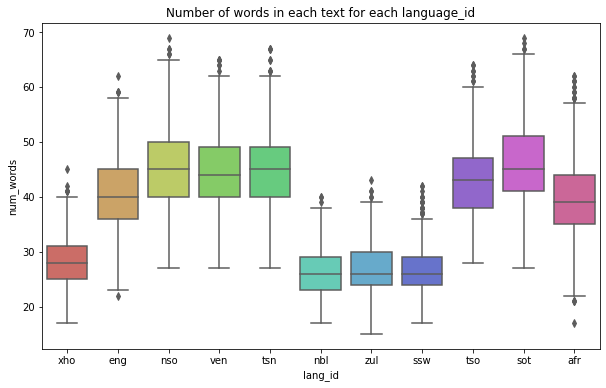

In [17]:
#Boxplot for number of words in each tweet
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize = fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x = 'lang_id', y = 'num_words', data = df_train, palette = ("hls"))

# title of the boxplot
plt.title('Number of words in each text for each language_id')

# showing the plot
plt.show()

#### Observations
​
- The words **believe, warm, world** and **real** are words that will most likely be used by the pro climate chage class to express their beliefs and reality of climate change. There is also EPA (United States Environmental Protection Agency), whose mission is to protect humans and  environment health.This brings us to the conclusion that the top frequent words are more aligned with the the pro climate change class

<a id="features"></a>
## 5. Feature Engineering and Feature Selection

<a id="model"></a>
## 6. Modelling

The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

The training data must contain the correct answer, which is known as a target or target attribute. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.
We train different models on the training data.

- **The training** set is a subset of the dataset to build predictive models.

- **Test** set or unseen examples is a subset of the dataset to assess the likely future performance of a model. If a model fit to the training set much better than it fits the test set, overfitting is probably the cause.

Data is randomly split into training and validation data sets. 80% is for training the model and 20% is for validation. 

In [20]:
y = df_train['lang_id']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_train['clean_text'],
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)

Models are put in a pipeline with a vectorizer. Machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. This process is called feature extraction or more simply, vectorization, and is an essential first step toward language-aware analysis.

- CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

- Frequency–Inverse Document Frequency Vectorizer Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index. 

**Random Forest Classifier**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

A decision tree is arriving at an estimate by asking a series of questions to the data, each question narrowing our possible values until the model get confident enough to make a single prediction. The order of the question as well as their content are being determined by the model. In addition, the questions asked  are all in a True/False form.

Decision Trees can be summarized as:

- predictive models that use a set of binary rules to calculate a target value.

- Each individual tree is a fairly simple model that has branches, nodes and leaves.

In [27]:
# random forest with CountVectorizer

rfc = Pipeline([('vect', CountVectorizer(max_df = 0.8, min_df = 0.1,
                                          ngram_range = (1,3))),
                
                         ('rfc', RandomForestClassifier(max_depth = 5, n_estimators = 100))])

rfc.fit(X_train, y_train)
metrics.f1_score(y_test, rfc.predict(X_test), average = 'macro')

0.5154908326699204

**Linear Support Vector Classification**

A support vector machine takes these data points and outputs the hyperplane (which in two dimensions it's simply a line) that best separates the tags. This line is the decision boundary.
Linear SVC (Support Vector Classifier) fits to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.

Similar to SVC with parameter kernel = ’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [28]:
# Linear Support Vector Classifier with TfidfVectorizer

lsvc = Pipeline([('tfidf', TfidfVectorizer(ngram_range = (1,3))), 
                 
                 ('lsvc', LinearSVC(C = 5, class_weight='balanced',
                                  max_iter = 8000))])

# Train model
lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('lsvc',
                 LinearSVC(C=5, class_weight='balanced', max_iter=8000))])

In [29]:
metrics.f1_score(y_test, lsvc.predict(X_test), average='macro')

0.9968038818089898

In [38]:


lr = Pipeline([('tfidf', TfidfVectorizer(ngram_range = (1,3))), 
                 
                 ('lr', LogisticRegression(multi_class='multinomial', solver='lbfgs'))])

lr.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('lr', LogisticRegression(multi_class='multinomial'))])

In [39]:
metrics.f1_score(y_test, lr.predict(X_test), average='macro')

0.9940451517097277

<a id="evaluation"></a>
## 7. Model Evaluation

Evaluating a model is a very important step throughout the development of the model. It is important to note that we can evaluate models successfully. Especially, when working in a supervised learning environment as the actual values are available. These values help in order for the evaluation methods to function.

Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data. It also focuses on how well the chosen model will work in the future.

Evaluating model performance with the training data is not acceptable in data science. It can easily generate overoptimistically and overfit models. There are two methods of evaluating models in data science, Hold-Out and Cross-Validation. To avoid overfitting, both methods use a test set (not seen by the model) to evaluate model performance.

We use the f-score to evaluate model performance. The F1-score or F1-measure is a measure of a model's accuracy in test data set. It is calculated from the precision and recall of the test data, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.

**Linear Support Vector Classification**

In [ ]:
metrics.f1_score(y_test, lsvc.predict(X_test), average='macro')

In [ ]:
# fit the new hyperparameter

svc = LinearSVC(C = 0.1, class_weight='balanced',
                                  max_iter = 5000,random_state = 42)

svc.fit(X_train, y_train) # fit the model

# check performance

score = f1_score(y_test, svc.predict(X_test) , average='macro')

In [ ]:
#params = {'random_state' : 42,
          'model_name' : 'LinearSVC'}

#metrics = {'f1_score' : score}

In [ ]:
# log our parameters and results

#experiment.log_parameters(params)

#experiment.log_parameters(metrics)

In [18]:
#experiment.end()

<a id="tuning"></a>
## 8. Hyperparameter Tuning

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.

Hyperparameters control the over-fitting and under-fitting of the model. Optimal hyperparameters often differ for different datasets. To get the best hyperparameters the following steps are followed:

- For each proposed hyperparameter setting the model is evaluated.

- The hyperparameters that give the best model are selected.

Hyperparameters Search: Grid search picks out a grid of hyperparameter values and evaluates all of them. Guesswork is necessary to specify the min and max values for each hyperparameter. Hyperparameter tuning picks a few hyperparameter settings, evaluates the validation matrices, adjusts the hyperparameters, and re-evaluates the validation matrices.

In [ ]:
# vectorized the data set

vectorizer = CountVectorizer(stop_words = 'english', max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))
test_data = df_test['clean_message']
vectorizer.fit(list(x_train) + list(x_test) + list(test_data))

X_train = vectorizer.transform(x_train) # vectorized x_train
X_test = vectorizer.transform(x_test) # vectorized x_test

# defining parameters

params = {
            'C': [0.1, 0.5, 1.0, 5.0],'max_iter' : [5000, 6000, 7000]
         }

# GridSearch

linear_svc_classifier_grid = GridSearchCV(LinearSVC(random_state = 42, class_weight='balanced'), 
                                          param_grid = params, n_jobs = -1, cv = 5, verbose = 5)

# fit the data set

linear_svc_classifier_grid.fit(X_train,y_train)

In [ ]:
# print best parameters

linear_svc_classifier_grid.best_params_

<a id="conclusion"></a>
## 9. Conclusion

- https://learn.g2.com/logistic-regression

- https://www.nationalgeographic.com/environment/article/global-warming-overview

- https://www.pewresearch.org/fact-tank/2020/10/15/64-of-americans-say-social-media-have-a-mostly-negative-effect-on-the-way-things-are-going-in-the-u-s-today/

- https://machinelearningmastery.com/what-is-imbalanced-classification/

- https://www.un.org/en/climatechange/cop26